In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
ds = load_breast_cancer()
data = ds['data']
target = ds['target']
feature_names = ds['feature_names']

data = pd.DataFrame(data, columns=feature_names)
target = pd.DataFrame(target)

data.shape, target.shape

((569, 30), (569, 1))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

#### Features intercorrelation & correlation with target

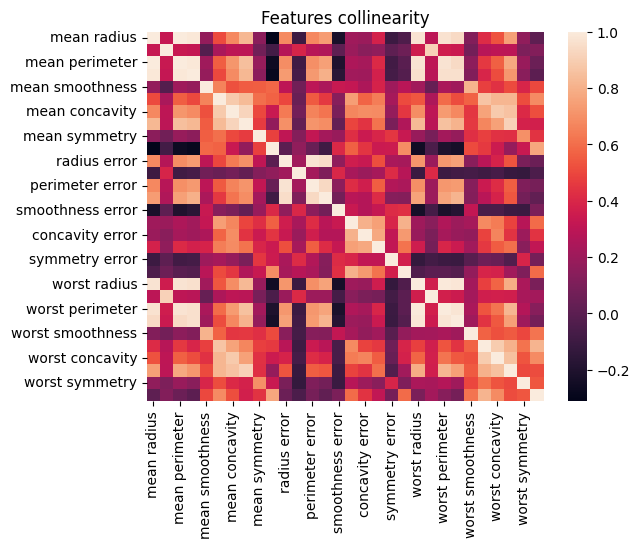

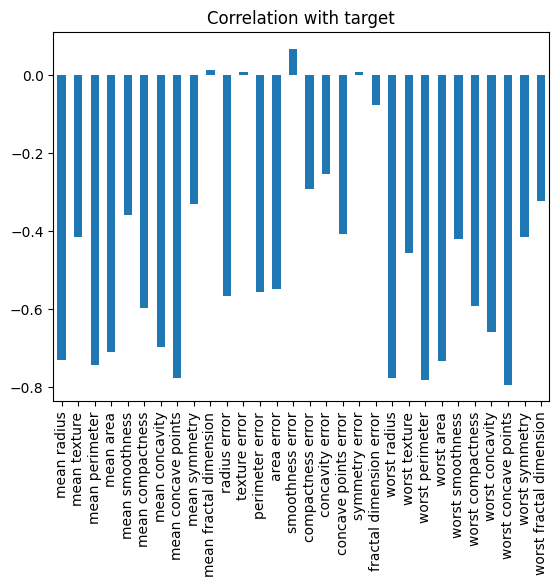

In [4]:
from explain.dataset import DatasetExplorer

de = DatasetExplorer(data, target)
de.display()

#### Simple auto-ml on binary classification task

In [5]:
from explain.train import train_binary_classifier

final_model = train_binary_classifier(X_train, y_train, X_test, y_test)

#### Confusion matrix & train set metric stability

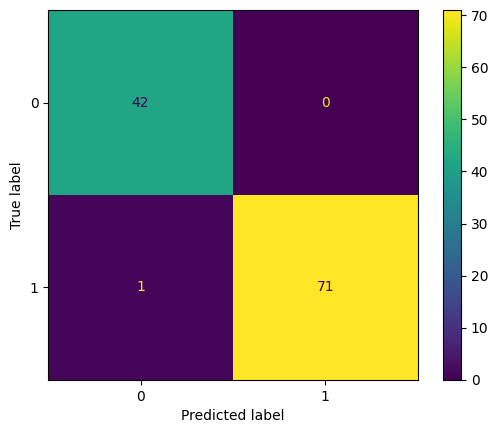

F1 score std on test set: 0.013793103448275846


'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.


In [6]:
from explain.model import ModelEvaluator

model_eval = ModelEvaluator(final_model)
model_eval.confusion_matrix(X_test, y_test)
print('F1 score std on test set:', model_eval.calc_metric_folded(X_test, y_test, f1_score).std())

#### Model explanation

In [7]:
from explain.model import ModelExplainer

model_ex = ModelExplainer(final_model, data)

SHAP model behaviour summarization:

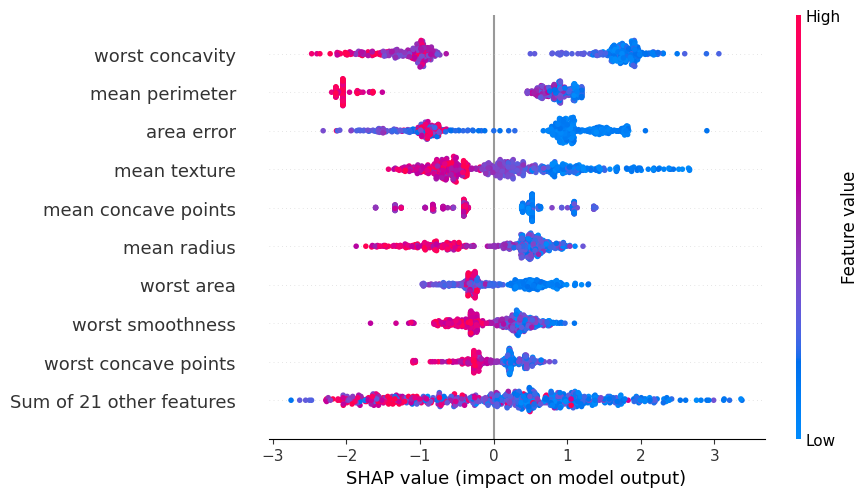

In [8]:
model_ex.plot_shap()

ICE plots for selected features:

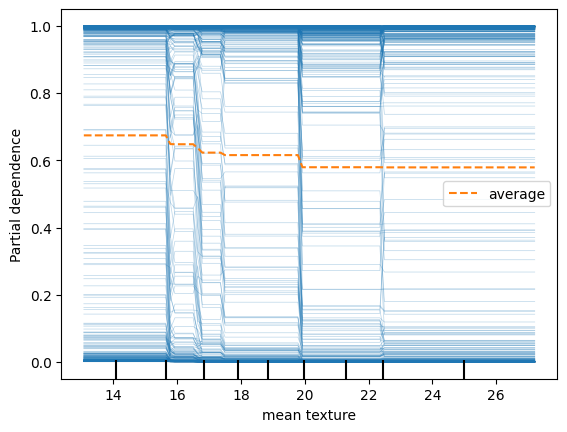

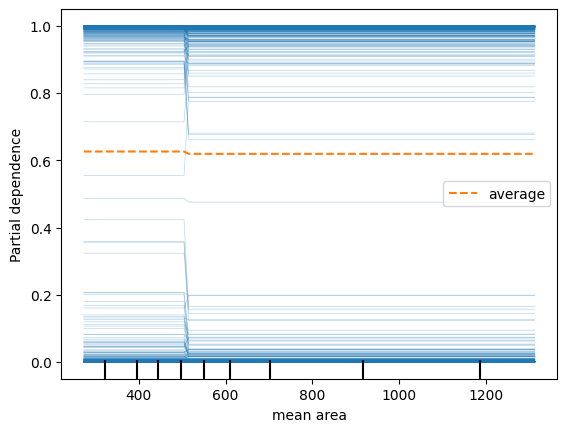

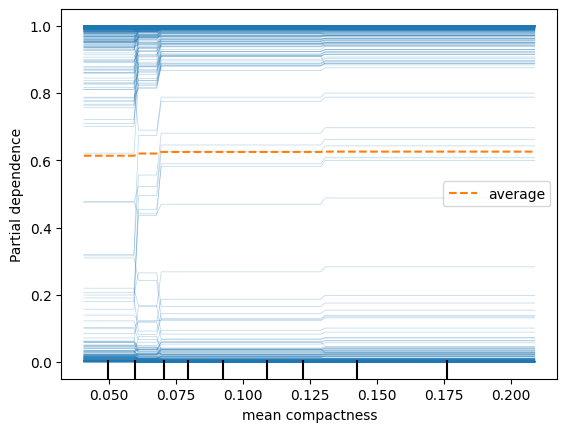

In [9]:
model_ex.plot_ice([1, 3, 5])

#### Explain single instances with lime

In [10]:
observation = data.sample(1)
model_ex.plot_lime(observation)

Explain single instances with anchors (Scoped Rules)

In [11]:
observation = data.sample(1)
model_ex.plot_anchors(observation)

Prediction: [1]
Anchor: worst concavity <= 0.11 AND area error <= 17.85
Precision: 0.99
Coverage: 0.11


#### Virtual datasets: plot model scores against dataset sized used for training

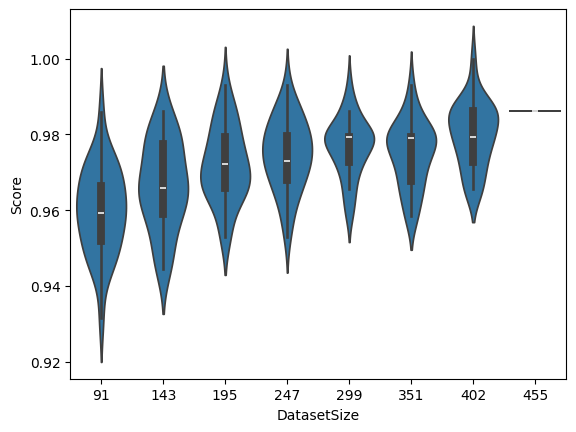

In [12]:
from explain.dataset import VirtualDataset

vds = VirtualDataset(final_model, f1_score, n_iter=8)
vds.display(data, target, density=30)